In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/content/drive/MyDrive/FIRE-SMOKE-DATASET/Train'

training_datagen = ImageDataGenerator(rescale=1./255)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224, 224),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 128
)

VALIDATION_DIR = '/content/drive/MyDrive/FIRE-SMOKE-DATASET/Test'

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (224, 224),
    class_mode='categorical',
    shuffle=True,
    batch_size = 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor = input_tensor, weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    training_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 784s 55s/step - loss: 7.7379 - acc: 0.7781 - val_loss: 0.1826 - val_acc: 0.9286
Epoch 2/20
14/14 [==============================] - 173s 12s/step - loss: 0.2643 - acc: 0.9109 - val_loss: 0.1744 - val_acc: 0.9133
Epoch 3/20
14/14 [==============================] - 174s 12s/step - loss: 0.0925 - acc: 0.9719 - val_loss: 3.6832 - val_acc: 0.5051
Epoch 4/20
14/14 [==============================] - 173s 12s/step - loss: 0.5982 - acc: 0.8828 - val_loss: 0.1350 - val_acc: 0.9592
Epoch 5/20
14/14 [==============================] - 173s 12s/step - loss: 0.0806 - acc: 0.9695 - val_loss: 0.1122 - val_acc: 0.9592
Epoch 6/20
14/14 [==============================] - 173s 12s/step - loss: 0.2428 - acc: 0.9228 - val_loss: 0.0926 - val_acc: 0.9643
Epoch 7/20
14/14 [==============================] - 174s 12s/step - loss: 0.0796 - acc: 0.9749 - val_loss: 0.1137 - val_acc: 0.9694
Epoch 8/20
14/14 [==============================] - 174s 12s/step - loss: 0.

In [ ]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    training_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 234s 16s/step - loss: 0.5736 - acc: 0.7560 - val_loss: 0.1358 - val_acc: 0.9694
Epoch 2/10
14/14 [==============================] - 227s 16s/step - loss: 0.4089 - acc: 0.8158 - val_loss: 0.1258 - val_acc: 0.9694
Epoch 3/10
14/14 [==============================] - 227s 16s/step - loss: 0.2677 - acc: 0.8822 - val_loss: 0.1225 - val_acc: 0.9694
Epoch 4/10
14/14 [==============================] - 227s 16s/step - loss: 0.1913 - acc: 0.9217 - val_loss: 0.1198 - val_acc: 0.9694
Epoch 5/10
14/14 [==============================] - 227s 16s/step - loss: 0.1479 - acc: 0.9402 - val_loss: 0.1213 - val_acc: 0.9592
Epoch 6/10
14/14 [==============================] - 227s 16s/step - loss: 0.1189 - acc: 0.9551 - val_loss: 0.1225 - val_acc: 0.9592
Epoch 7/10
14/14 [==============================] - 226s 16s/step - loss: 0.0904 - acc: 0.9719 - val_loss: 0.1209 - val_acc: 0.9592
Epoch 8/10
14/14 [==============================] - 240s 17s/step - loss: 0.

In [14]:
model.save('./drive/MyDrive/models/Fire_Detection_Model.h5')

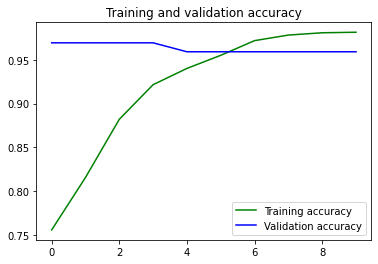

<Figure size 432x288 with 0 Axes>

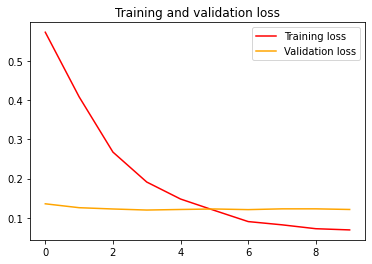

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()